In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)
print("Libs imported")

Libs imported


In [ ]:
df1=  pd.read_csv(f"{C:\Users\JagbirSingh\OneDrive - inmorphis.com\Desktop\My Own\Coding Practice\ML Projects\Bengaluru House Price Prediction\Bengaluru_House_Data.csv}")
df1.head()

In [9]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df1.shape

(13320, 9)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [18]:
df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [24]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [25]:
df1.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [44]:
#Drpping some columns
df2 = df1.drop(['area_type','availability', 'society','balcony' ], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [49]:
#Handling missing values

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [52]:
# Missing value records will be dropped as they too less in count
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [53]:
df3.shape

(13246, 5)

In [56]:
# Size columns values are not in standard form. Will check it
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [57]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\JagbirSingh\AppData\Local\Temp\ipykernel_23840\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [58]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [62]:
#Removing the original size columns because we have created new one
df3 = df3.drop('size', axis = 1)

In [63]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [64]:
# Total_sqft has some issue. Instead of single number a range is given at some places
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [68]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [73]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [74]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [77]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [79]:
#Feature engineering
# New column 'Price per sqft will be created'

df5 = df4.copy()
df5['price_per_sqft'] = (df5.price * 100000) / df5.total_sqft
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [97]:
# Location column has 1298 unique categories. If we will use one hot encoding, then we will have 1330+ columns.
# So, we need to do dimensionality reduction.
# For all location that have low frequency, we will group them into 'Others' value

df5.location.describe()
df5.location = df5.location.apply(lambda x: x.strip())    # For removing extra space at the beginning or end of the string

temp_var = df5.location.value_counts()
location_with_low_freq = temp_var[temp_var <= 10]
location_with_low_freq

location
Ganga Nagar                          10
Kalkere                              10
Dairy Circle                         10
1st Block Koramangala                10
Sector 1 HSR Layout                  10
                                     ..
Zuzuvadi                              1
Chellikere                            1
Jakkasandra                           1
Gulakamale                            1
Beml layout, Rajarajeshwari nagar     1
Name: count, Length: 1047, dtype: int64

In [98]:
df5.location = df5.location.apply(lambda x: "Other" if x in location_with_low_freq else x )  #Applying lambda function to change values

In [104]:
df5.location.head(10)  # Note that it now has 'Other' as a value

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       Other
Name: location, dtype: object

# Outlier removal

In [105]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [108]:
df5[df5.total_sqft / df5.bhk < 275]    # Removing rows where number of BHK is extreme as compared to total sqft

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13221,Other,1178.0,9.0,75.0,9,6366.723260
13277,Other,1400.0,7.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,130.0,6,10833.333333
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [111]:
df6 = df5[df5.total_sqft / df5.bhk >= 275]
df6.shape

In [114]:
#Removing outliers on Price per sqft

def pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean- std)) & (subdf.price_per_sqft <= (mean + std)) ]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True, axis = 0)
    return df_out
        

In [115]:
df7 = pps_outliers(df6)


In [116]:
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10327,Yeshwanthpur,1676.0,3.0,92.13,3,5497.016706
10328,Yeshwanthpur,2503.0,3.0,138.00,3,5513.383939
10329,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032
10330,Yeshwanthpur,1876.0,3.0,160.00,3,8528.784648


In [123]:
# Removing rows where count of bathrooms is 2 more than the number of bedrooms
df8 = df7[~(df7.bath  > df7.bhk + 2)]
df8.shape

(10328, 6)

Text(0, 0.5, 'No of records ')

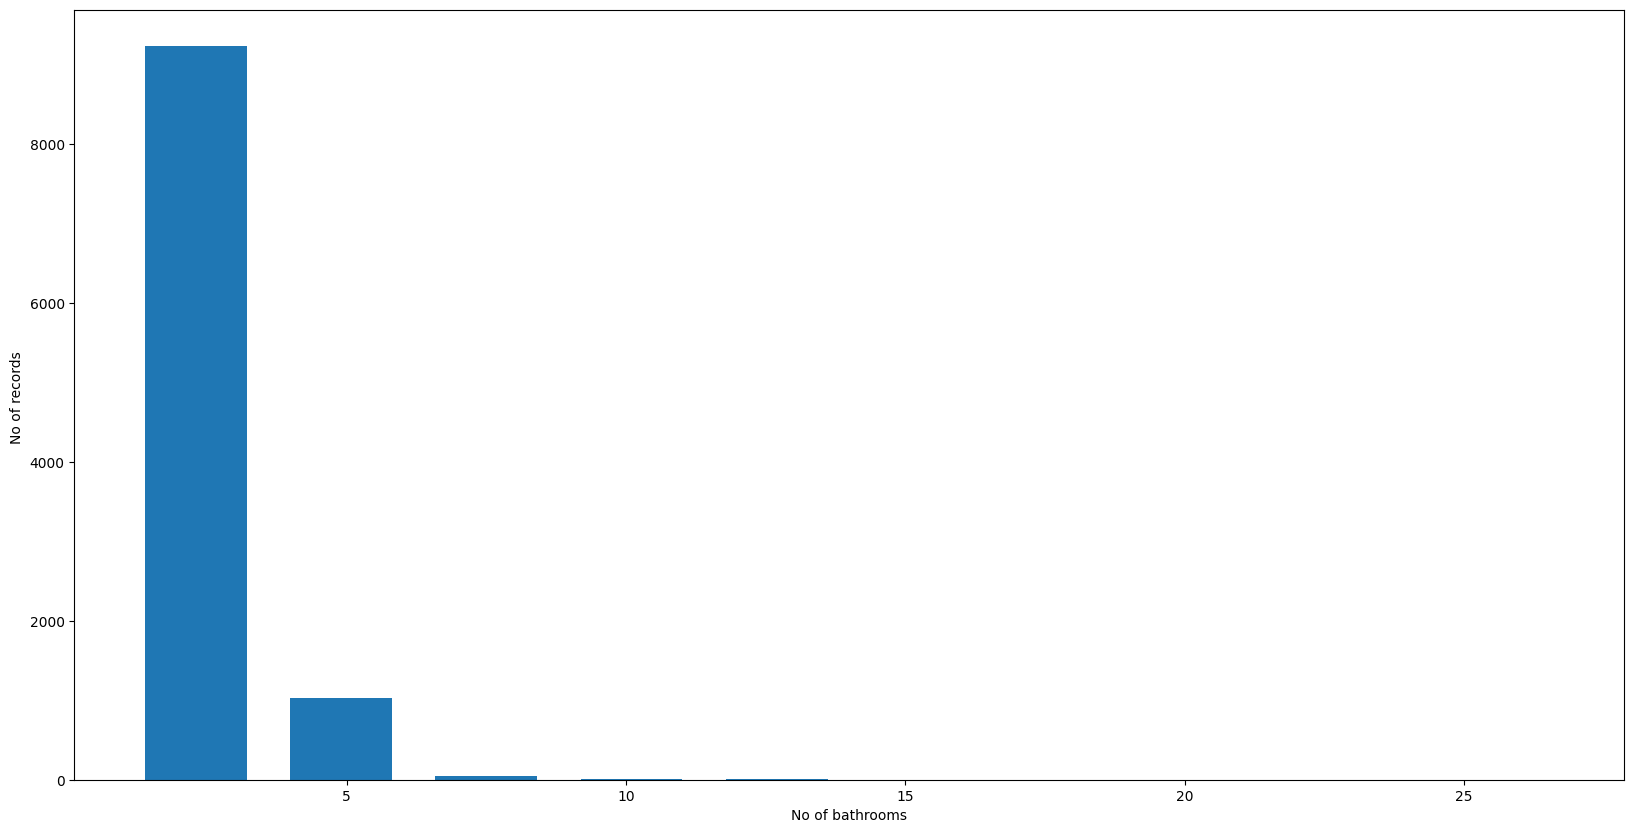

In [126]:
plt.hist(df8.bath, rwidth = .7)
plt.xlabel('No of bathrooms')
plt.ylabel('No of records ')

In [138]:
# Removing the rows where house with more bedrooms is cheaper than houses with less bedrooms in the same location
# Plotting scatter plot to visualize

def plot_scatter_chart(df,location):
    bhk1 = df[(df.location==location) & (df.bhk==1)]
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.total_sqft,bhk1.price,color='orange',label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    #plt.xlabel("Total Square Feet Area")
    #plt.ylabel("Price (Lakh Indian Rupees)")
    #plt.title(location)
    #plt.legend()
    
#plot_scatter_chart(df8,"Rajaji Nagar")

In [141]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'] - 70)].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
df9.shape

(7526, 6)

In [174]:
df10 = df9.drop('price_per_sqft', axis = 1)
df10.shape

(7526, 5)

location
Cunningham Road           10
Bommenahalli              10
Doddakallasandra          10
Dommasandra               10
Gollarapalya Hosahalli    10
                          ..
Banjara Layout             4
Vishveshwarya Layout       4
Nagasandra                 4
Vishwapriya Layout         4
Marsur                     3
Name: count, Length: 67, dtype: int64

In [180]:
# One hot encoding categorical column- 'location'
dummies = pd.get_dummies(df10.location)
dummies
df11 = pd.concat([df10.drop('location', axis = 1), dummies.drop('Marsur', axis = 1)], axis = 1)
df11.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
# Creating separate target variable from the whole data set
X = df11.drop('price', axis = 1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [217]:
y = df11.price
y.head(6)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
5    413.0
Name: price, dtype: float64

In [247]:
# Creating separate training and testing data sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 15)

In [205]:
#from sklearn.linear_model import LinearRegression
#lr_clf = LinearRegression()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)

In [206]:
# Doing Cross Validation. If Cross validation is to be done. train_test_split is not needed. As that inherently taken care in cross_val
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

folds = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 5)
cross_val_score(LinearRegression(), X, y, cv = folds)

array([0.83338957, 0.81912926, 0.84941178, 0.86624897, 0.83206772])

In [218]:
# Model selection and hyper paramter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR                                    #SupportVectorRegression

In [234]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'svm': {
            'model': SVR(),
            'params': {
                'kernel': ['poly', 'rbf', 'sigmoid'],
                'degree': [1, 2, 3],
                'C': [1, 2.25, 3.5]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    df_algos = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    print(df_algos.best_params)
    print(df_algos)
    return df_algos

find_best_model_using_gridsearchcv(X,y)




0    {'C': 3.5, 'degree': 1, 'kernel': 'poly'}
Name: best_params, dtype: object
  model  best_score                                best_params
0   svm    0.725076  {'C': 3.5, 'degree': 1, 'kernel': 'poly'}


,model,best_score,best_params
0,svm,0.725076,"{'C': 3.5, 'degree': 1, 'kernel': 'poly'}"


In [ ]:
#Results from GridSearch
#model			    best_score			best_params
#linear_regression	0.849715			{'fit_intercept': False}
#random_forest		0.826736			{'max_depth': 40, 'max_features': 0.8, 'n_esti...
#gradient_boosting	0.822592			{'learning_rate': 0.075, 'max_depth': 40, 'max.
#svm			    0.725076			{'C': 3.5, 'degree': 1, 'kernel': 'poly'}

In [248]:
# Define the final model on the basis of GridSearchCV results

model_lr = LinearRegression(fit_intercept = False)
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.8279734501196805

In [255]:
# Create function to test model on some random values
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    predicted_amount = model_lr.predict([x])[0]

    return str(predicted_amount) + ' Lakhs'

In [257]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\JagbirSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'185.28055325297228 Lakhs'

In [256]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\JagbirSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'84.0858712277179 Lakhs'

In [258]:
# Export the model to Pickle file
import pickle
with open('B_House_Price_Model.pickle', 'wb') as f:
    pickle.dump(model_lr, f)

In [259]:
#Export column names. These will be used in our web application for this model
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    json.dump(columns,f)

In [ ]:
#_______________________________End___________________________________________